# What the heck is a temperature blanket?

It's a pretty simple concept: you knit one or two rows every day, choosing your color based on the temperature. Blues and greens for cooler, reds and oranges for hotter, you get the idea. It's a lovely and functional data visualization. But what if... we visualized another axis? In particular, the idea of a blanket is to be warm, warm on the cold dark nights of winter. So how about we make not just the color of the blanket vary with the temperature, but the width of the blanket vary with the length of the night—and we'll vary our color with the _coldest_ temperature of the day, too. 

This will require some data-crunching. 

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt

% matplotlib inline

First, let's get some weather data! NOAA (The National Oceanic and Atmospheric Administration) is my go-to for weather data. You can connect via API for a lot of types of data but historical data by specific weather station isn't one of them. I downloaded two different files, one is 22 years of Chicago weather and the other is one year of weather from Seattle, San Francisco, Denver, and New York. 

In [2]:
#Pull the weather data in:
df1 = pd.read_csv('1216693.csv')
df2 = pd.read_csv("1207806.csv")
df_wx_all = pd.concat([df1, df2], axis=0)

In [3]:
#We'll induce pandas to recognize the date format, and we'll get rid of some data we don't need.
df_wx_all['DATE'] = pd.to_datetime(df_wx_all['DATE'])
del df_wx_all['STATION']
del df_wx_all['TAVG']
df_wx_all

,NAME,DATE,TMAX,TMIN
0,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-21,71.0,54.0
1,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-22,75.0,55.0
2,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-23,68.0,53.0
3,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-24,69.0,52.0
4,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-25,72.0,56.0
5,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-26,80.0,56.0
6,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-27,85.0,58.0
7,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-28,76.0,54.0
8,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-29,72.0,55.0
9,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2016-06-30,73.0,55.0


Now let's just make a list of the places that we're going to deal with—we'll need the state names in a little while to download astronomical data. (You'll note that I've percent-coded the spaces in our city names; I've entertained thoughts of making this a web app.)

In [4]:
new_places = [["Chicago", "IL", "CHICAGO MIDWAY AIRPORT, IL US"],["Denver", "CO", 'DENVER INTERNATIONAL AIRPORT, CO US'
       ], ["Seattle", "WA", 'SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US'
       ], ["San%20Francisco", "CA", 'SAN FRANCISCO DOWNTOWN, CA US'], ["New%20York","NY", 'JFK INTERNATIONAL AIRPORT, NY US']]


In [5]:
#regularizing place names:
for city in new_places:
    df_wx_all['NAME'] = df_wx_all['NAME'].replace(city[2], city[0])
df_wx_all.sample(n=25)


,NAME,DATE,TMAX,TMIN
518,Denver,2016-11-21,65.0,41.0
866,San%20Francisco,2016-11-04,71.0,57.0
85,Chicago,1997-09-14,80.0,65.0
5562,Chicago,2012-09-18,64.0,50.0
4199,Chicago,2008-12-24,35.0,7.0
3550,Chicago,2007-03-16,39.0,26.0
1625,Chicago,2001-12-06,52.0,39.0
1207,New%20York,2016-10-11,63.0,45.0
2804,Chicago,2005-02-28,36.0,26.0
955,San%20Francisco,2017-02-01,56.0,50.0


In [6]:
#Now we'll set the weather data to be indexed by both place and name 
#so we can unite it with the astronomical data
df_wx_all = df_wx_all.set_index(['DATE','NAME'])

## Now let's get some astronomical data!

For sunrises and sunsets you'd think that NASA might be where to go, but no, it's the Naval Observatory. (Highly recommended background reading: [_Longitude_, by Dava Sobel](https://www.semcoop.com/longitudethe-true-story-lone-genius-who-solved-greatest-scientific-problem-his-time), which overstates the lone-genius aspect of chronometry, but describes the stakes of timekeeping and astronomy—life and death on the high seas, not to put too fine a point on it—wonderfully.) 

The Observatory comes through, sort of. Their website parses location and delivers a perfectly regular report of exactly what we want: minutes of darkness each 24-hour period. But it's formatted as _vertical_ columns of text. Oy. [Here's an example.](http://aa.usno.navy.mil/cgi-bin/aa_durtablew.pl?form=1&year=2018&task=1&state=IL&place=Chicago) And here, more usefully, is a parser: 

In [8]:
import urllib.request

#This is seriously the one part of this that I'm still not 100% happy with.
#I couldn't get the binary file from USNO to parse straight into text-with-line-breaks. 
#So it's saved, then opened and read one line at a time. 
def getdarkdata(place):
    appended_data = []
    for n in range(2016,2018):
        url = "http://aa.usno.navy.mil/cgi-bin/aa_durtablew.pl?form=1&year=" + str(n) + "&task=1&state=" + place[1] + "&place=" + place[0]
        datafilename = "darkdata_" + str(n) + "_" + place       
        with urllib.request.urlopen(url) as f:
            with open(datafilename, "w", newline = '') as filewriter:
                filewriter.write(f.read().decode('utf-8'))            

#A little helper function we'll use to convert to minutes:
def tominutes(hhmm):
    hh,mm = hhmm.split(":")
    return (int(hh))*60 + int(mm)
                
#Here, we're parsing the data from 2016 and 2017.
#We'll trim everything down to the period from summer solstice to summer solstice.                
def parsedarkdata(place):
    filename1 = "darkdata_2016_" + place 
    filename2 = "darkdata_2017_" + place 
    files = [filename1, filename2]
    appended_data = []
    for file in files:
        
        with open(file, "r", newline = '') as filereader:
            cleantable = []
            for row in filereader:
                if len(row) > 1: 
                    if row[1] in string.digits:
                        cleantable.append(row)
            cleantable = [row[8:112] for row in cleantable]
            cleantable = [row.replace("             ","    False    ") for row in cleantable]
            cleantable = [row.split("    ") for row in cleantable]

            for n in range(0,12):
                for row in cleantable:
                    if row[n] != "False":
                        appended_data.append(row[n])
                    
    appended_data = [tominutes(day) for day in appended_data]
    yeardata = pd.DataFrame(appended_data, columns=["minutesofnight"])
    yeardata['NAME'] = place
    yeardata['DATE'] = pd.date_range('2016-01-01', '2017-12-31', freq = 'D')
    yeardata = yeardata.set_index(['DATE','NAME'])
    yeardata = yeardata["2016-06-21" : "2017-06-20"]
    return(yeardata)

        
        

In [10]:
newdarkdata = []
for place in new_places:
    darkdata = parsedarkdata(place[0])
    newdarkdata.append(darkdata)
newdarkdata = pd.concat(newdarkdata, axis = 0)
newdarkdata

,,minutesofnight
DATE,NAME,
2016-06-21,Chicago,527
2016-06-22,Chicago,527
2016-06-23,Chicago,527
2016-06-24,Chicago,527
2016-06-25,Chicago,527
2016-06-26,Chicago,528
2016-06-27,Chicago,528
2016-06-28,Chicago,529
2016-06-29,Chicago,529


### The magic occurs!

Here's where we unite the weather data and the darkness data:

In [12]:
df_wx_all = pd.merge(df_wx_all, newdarkdata, how='right', left_index=True, right_index=True)

The sharp-eyed will have noted that we merged _right_ in the step above, preserving every row in the astronomical data column. Why? Some days are missing weather data. Not very many—I had to search different weather sources to find the most reliable, and I double checked to make sure that we weren't missing any great chunks of data, just a day or two here and there.

But we do want to fill that data (at least for these purposes, to have a smooth curve at the edges of our blanket!), so we'll use `fillna(method='ffill')` to copy the day's before into any missing slots. 

In [13]:
df_wx_all.fillna(method='ffill', inplace=True)

### Just a little more magic:

OK, not magic, statistics. Here I've divided the daily minimums into deciles using `qcut`, and I've assigned each of them a color, from purple through blue, green, yellow, orange, and red. The colors are taken from ten Lion Brand yarns (my better half and the more productive knitter amongst the two of us made a wonderful ten-stripe blanket from it). 

In [14]:
df_wx_all['negminutes'] = [-val for val in df_wx_all['minutesofnight']]
colors = ['#b3003b','#990099','#005c99','#0099ff','#ccebff','#009900','#00ff00','#ffff00','#ff9900','#ff3300']
df_wx_all['color'] = pd.qcut(df_wx_all["TMIN"],10 ,labels=colors)

In [15]:
#I did this a bunch just to make sure things were working. Shhhhh!
df_wx_all.sample(n=30)


,,TMAX,TMIN,minutesofnight,negminutes,color
DATE,NAME,,,,,
2017-03-13,San%20Francisco,76.0,51.0,728,-728,#009900
2016-07-19,San%20Francisco,64.0,53.0,575,-575,#00ff00
2017-06-01,Denver,80.0,49.0,552,-552,#ccebff
2016-11-22,Seattle,53.0,43.0,900,-900,#0099ff
2016-07-10,San%20Francisco,70.0,54.0,564,-564,#00ff00
2017-03-28,Seattle,53.0,44.0,681,-681,#0099ff
2017-05-07,San%20Francisco,65.0,50.0,601,-601,#009900
2017-03-11,Chicago,30.0,18.0,736,-736,#b3003b
2017-02-04,Denver,60.0,29.0,821,-821,#990099


In [16]:
#getting rid of stuff we don't need
del df_wx_all['TMIN']
del df_wx_all['TMAX']

In [34]:
#This will let us more easily sort by city. 
df_wx_all.reset_index(inplace=True)

In [42]:
def make_image(place):
    df = df_wx_all[df_wx_all['NAME'] == place]
    colors = [item for item in df['color']]
    fig, ax = plt.subplots(figsize=(12,12))
    ax.barh(range(365), df['minutesofnight'], color=colors)
    ax.barh(range(365), df['negminutes'], color=colors)
    ax.tick_params(width=0)
    ax.grid(False)
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# The big reveal

Let's see what each of our cities look like! (Note, the color deciles are national, this really makes the different cities pop.) 

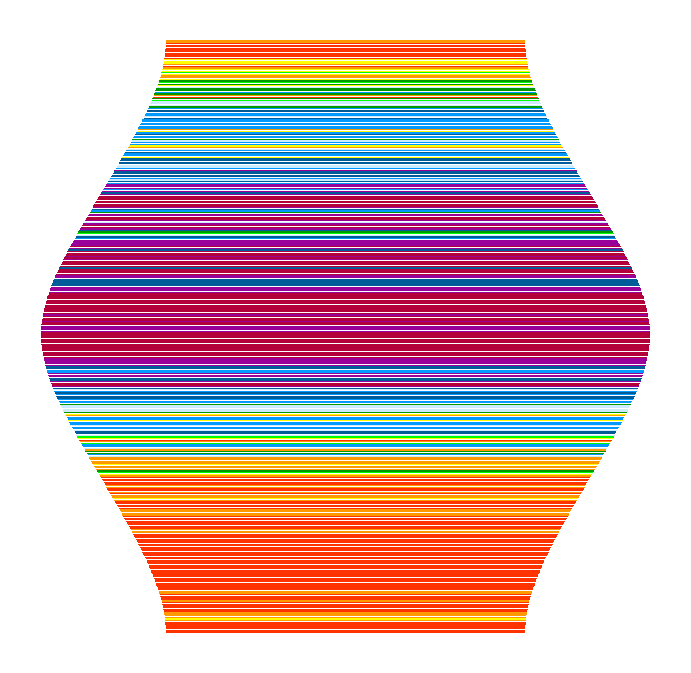

In [40]:
make_image('Chicago')

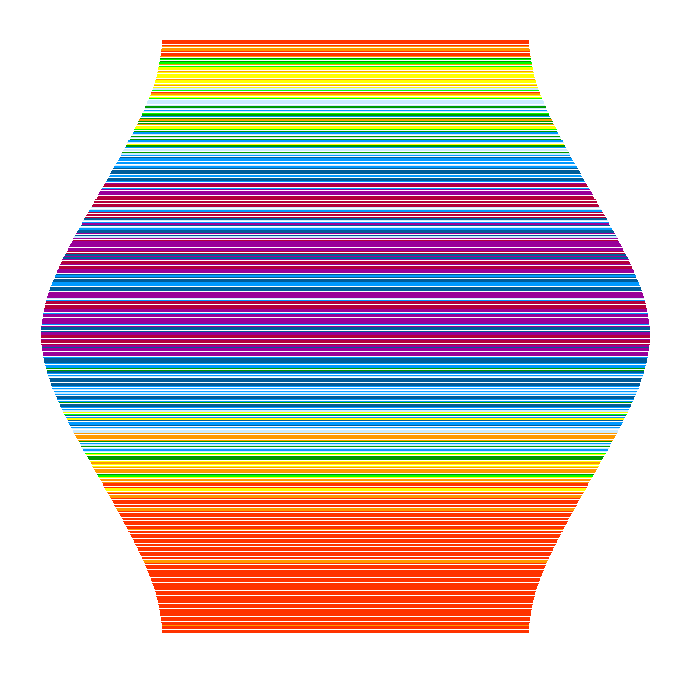

In [43]:
make_image("New%20York")

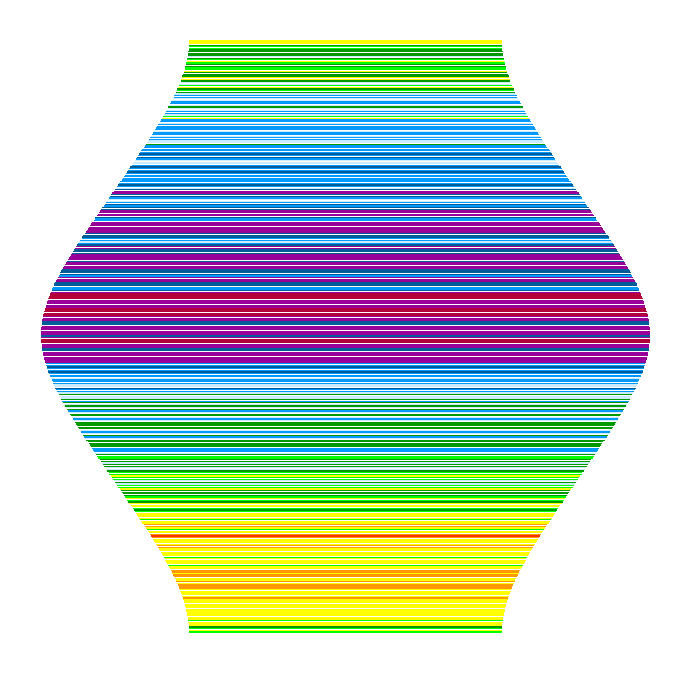

In [44]:
make_image("Seattle")

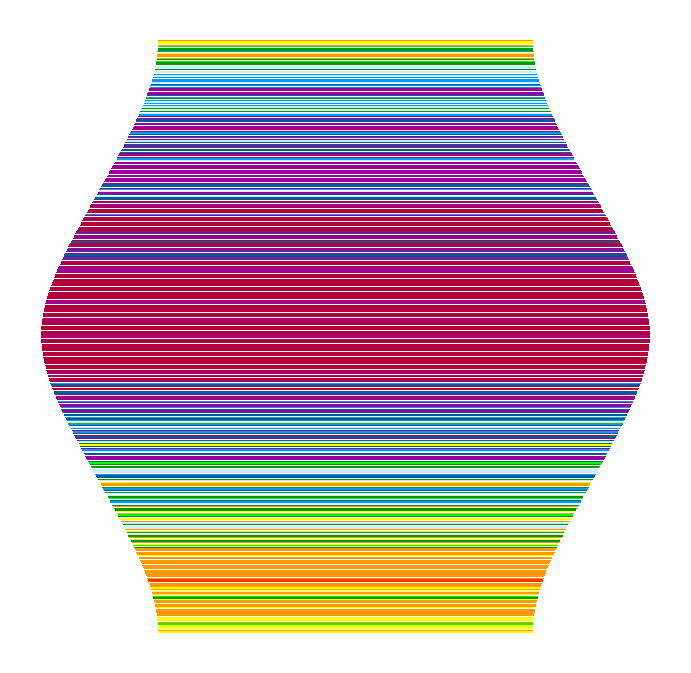

In [45]:
make_image("Denver")

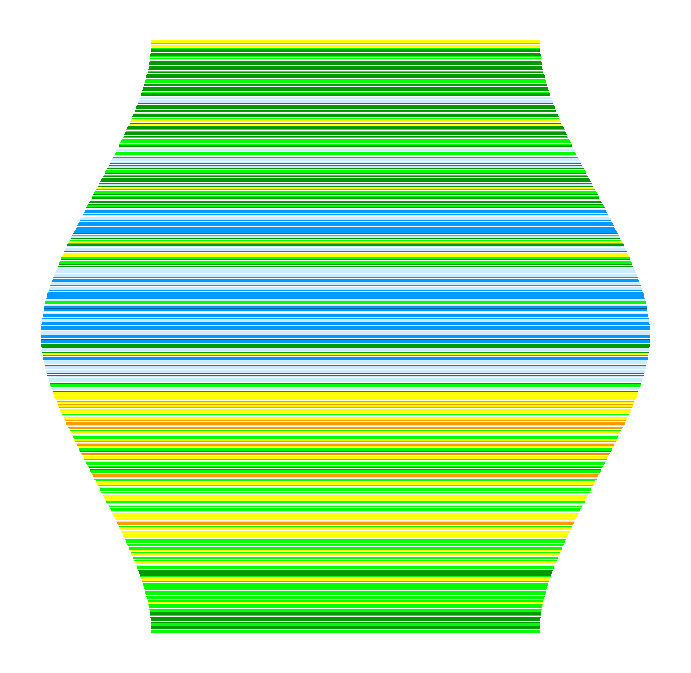

In [46]:
make_image("San%20Francisco")

Enjoy! 

I'm happy to share more detailed knitting instructions or hear comments. 
timmy mcg @ gmail